## Papadopulos-Cooper interpratation

This notebook demonstrates how to use **OpenHyTest** for the interpretation of a pumping test with the Papdopulos-Cooper (1967) solution for confinded aquifer including wellbore storage. 

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data
The data set for this example comes from the following reference: 

HALL P., CHEN J., 1996. Water well and aquifer test analysis. Water Resources Publications, LLC, 412 pp. The test data are published on page 171-174. 


rw=0.6096   Radius of the well in m

rc=0.6096   Radius of the casing in m

r=3.048     Radial distance in m

q=0.0050472 Pumping Rate in m3/s

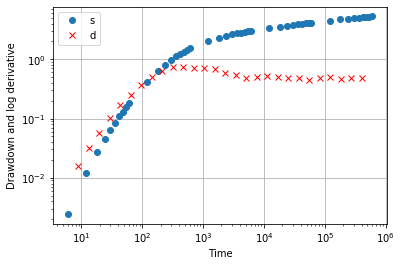

In [2]:
data = pd.read_csv('../data/pca_ds1.txt', header=None,sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(data)
test.diagnostic()

## Model

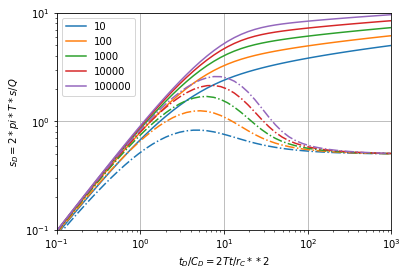

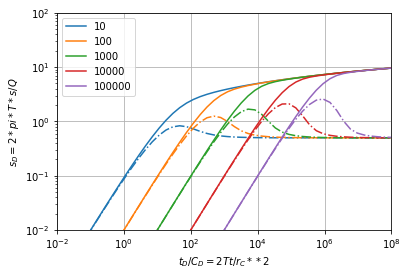

In [3]:
model = ht.PapadopulosCooper(r=1, rc=1)
model.plot_typecurve()

## Fit data with direct estimate of storativity

We obtain a relatively poor fit to the data both at early and late time indicating that the model of Papadopulos-Cooper (1967) cannot explain well the observations. 

estimated parameter vector: [ 1.12133498 12.07038587]


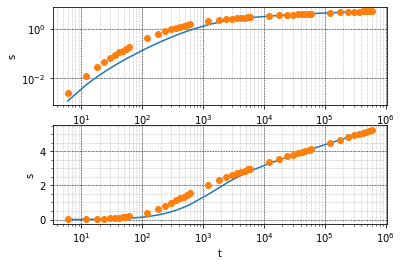

T =  0.0008247474304395393 m2/s
S =  0.0024065278741004052 -
Cd =  207.76821468851975 -


In [4]:
PC = ht.PapadopulosCooper(Q=0.0050472, r=3.048, rw=0.6096, rc=0.6096, df=data, inversion_option='stehfest')
p = PC.guess_params()
print("estimated parameter vector:",p)
PC._coeff()
PC.trial()

Please, first specifiy the number of coefficient used for the inversion.
`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 1.8137e+00, final cost 7.4911e-01, first-order optimality 9.45e-05.


../openhytest/modelclasses.py:2683: RuntimeWarning: invalid value encountered in sqrt
  sp = np.sqrt(pd)


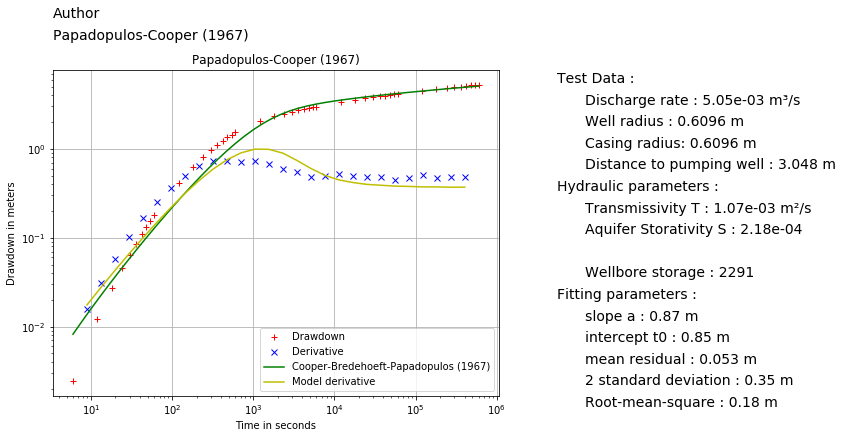

In [5]:
PC.rpt()

Hall and Chen (1996) analyze the same data but they relax the definition of the wellbore storage coefficient and estimate it independtly from the
estimation of the storativity. This leads to a local storativity around the well different from the aquifer storativity. They obtain:

alpha = 0.01   which is equivalent to Cd = 50

T  = 7.97E-04

S  = 2.9E-03  (late time asymptote)

S2 = 1.0E-02 (estimated from Cd)

In the following, we interpret the same data with the method of Hall and Chen.

## Fit data with given local storativity


`xtol` termination condition is satisfied.
Function evaluations 13, initial cost 5.6514e-02, final cost 9.0564e-03, first-order optimality 8.56e-06.


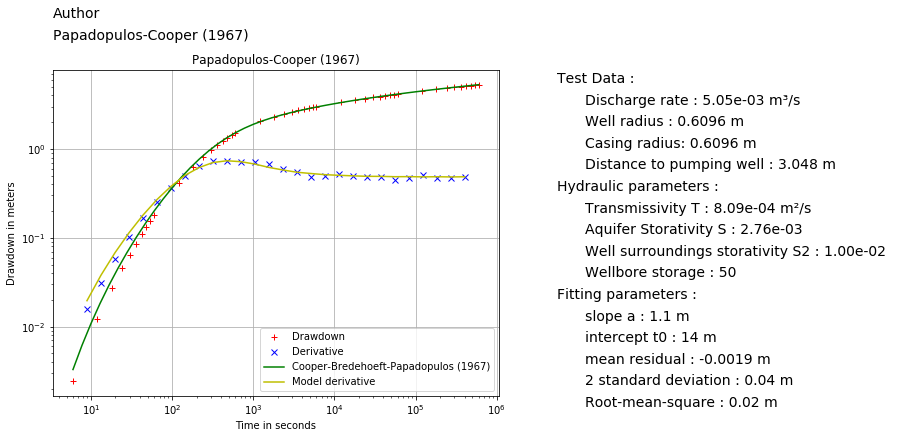

In [6]:
coobredpapa= ht.PapadopulosCooper(Q=0.0050472, r=3.048, rw=0.6096, rc=0.6096, cD=50, df=data, inversion_option='dehoog')  
coobredpapa.guess_params()
coobredpapa.rpt()

Comparison with Hall and Chen (1996)

Our results are in good agreement with the values found by Hall and Chen (1996) - figure 9.8 page 174 (see above).

## Another example

The data set for this example comes from the following reference: 
Rushton K.R. and Holt S.M., 1981, Estimating aquifer parameters for large-diameter well. Ground Water, 19(5): 505-509
Digitized from figure 3b page 508.

The test is conducted in a well in a confined aquifer in south India.

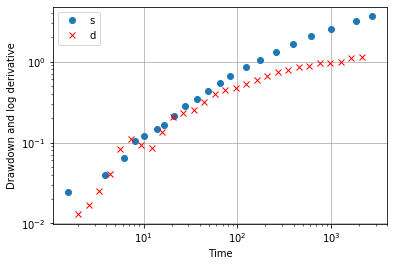

In [2]:
data = pd.read_csv('../data/pcw_ds1.txt', header=None,sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(df=data)
test.diagnostic()

In [ ]:
pcw hytool solution? -> different cd calc, rest similar